In [1]:
# Assignment 2:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


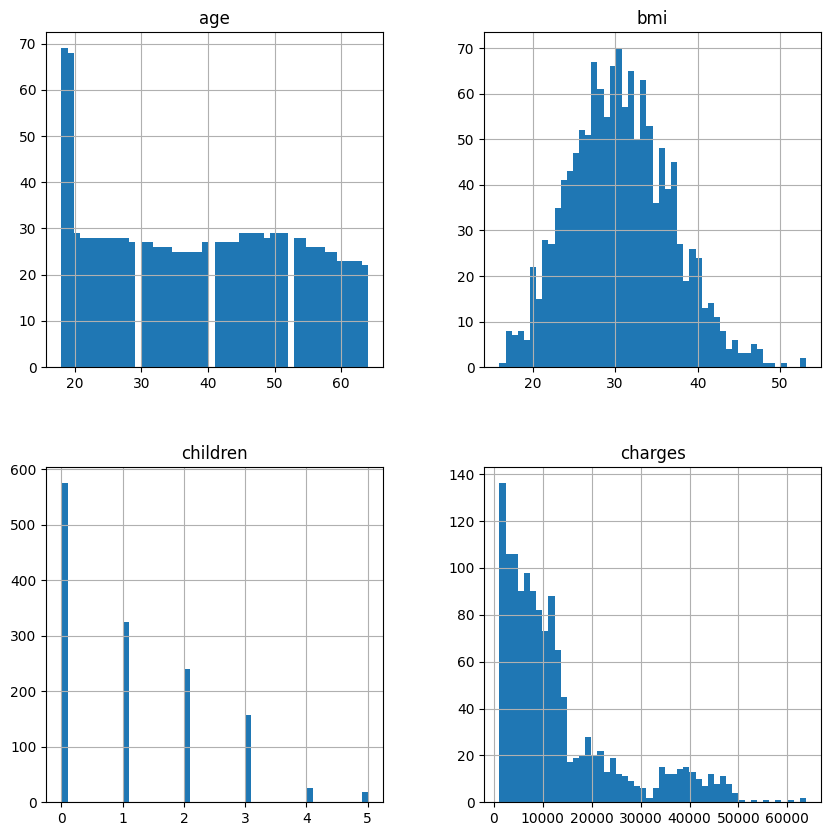

In [6]:
# Illustrate the feature distributions using histogram.
df.hist(bins=50, figsize=(10,10))
plt.show()

In [7]:
# Data cleaning, Data integration, Data transformation, Data model building

df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [8]:
# check repeat values

df.duplicated().sum()

1

In [9]:
# remove duplicated values
df.drop_duplicates(inplace=True)

<Axes: >

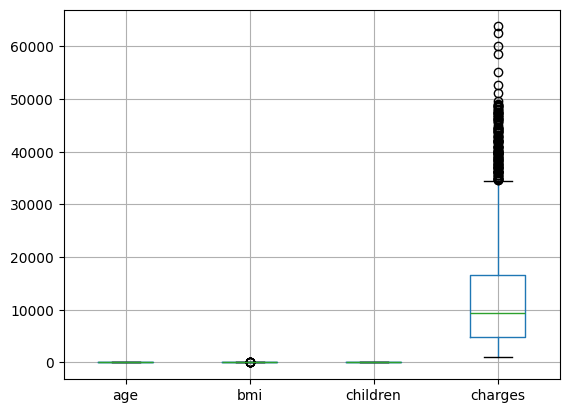

In [10]:
# check outliers

df.boxplot()

In [11]:
# Convert relevant columns to numeric type
# Replace 'bmi', 'charges', and any other relevant columns with their actual names
for column in ['bmi', 'charges', 'age']:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Now proceed with outlier handling
# Filter out non-numeric columns before calculating quantiles
numeric_df = df.select_dtypes(include=np.number)
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

In [12]:
# Random Forest model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score


In [13]:
# split data

X = df.drop('charges', axis=1)
y = df['charges']


In [14]:
# Initialize model

model = RandomForestRegressor()

In [15]:
# ipython-input-43-6921f8014714
# split data
import pandas as pd

X = df.drop('charges', axis=1)
# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['sex', 'smoker', 'region'], drop_first=True)  # Adjust column names as needed
y = df['charges']

In [16]:
# ipython-input-42-940a1ad12e84
# Random Forest model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ipython-input-43-940a1ad12e84
# split data

X = df.drop('charges', axis=1)
y = df['charges']

# ipython-input-44-940a1ad12e84
# Initialize model

model = RandomForestRegressor()

# ipython-input-46-940a1ad12e84
# ipython-input-43-6921f8014714
# split data
import pandas as pd

X = df.drop('charges', axis=1)
# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['sex', 'smoker', 'region'], drop_first=True)  # Adjust column names as needed
y = df['charges']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Added this line to split the data

# Fit the model to the training data
model.fit(X_train, y_train) # Added this line to fit the model


# ipython-input-47-940a1ad12e84
# Make predictions on test set
y_pred = model.predict(X_test)

In [18]:
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 21387673.978913337
R-squared: 0.8836083364621387
